<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Review-of-RNNs" data-toc-modified-id="Review-of-RNNs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Review of RNNs</a></span></li><li><span><a href="#Deep-Learning" data-toc-modified-id="Deep-Learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Deep Learning</a></span><ul class="toc-item"><li><span><a href="#Regression-vs-Classsification" data-toc-modified-id="Regression-vs-Classsification-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Regression vs Classsification</a></span></li><li><span><a href="#Data-Loaders" data-toc-modified-id="Data-Loaders-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Loaders</a></span></li></ul></li><li><span><a href="#Questions:" data-toc-modified-id="Questions:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Questions:</a></span><ul class="toc-item"><li><span><a href="#Question:-Is-it-better-to-put-BatchNorm-before-or-after-ReLU?" data-toc-modified-id="Question:-Is-it-better-to-put-BatchNorm-before-or-after-ReLU?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Question: Is it better to put BatchNorm before or after ReLU?</a></span></li><li><span><a href="#Question:-What-is-the-intuition-behind-using-dropout-after-a-BatchNorm?-Doesn’t-BatchNorm-already-do-a-good-job-of-regularizing?" data-toc-modified-id="Question:-What-is-the-intuition-behind-using-dropout-after-a-BatchNorm?-Doesn’t-BatchNorm-already-do-a-good-job-of-regularizing?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Question: What is the intuition behind using dropout after a BatchNorm? Doesn’t BatchNorm already do a good job of regularizing?</a></span></li><li><span><a href="#Question:-When-you-are-incrementally-building-on-top-of-smaller-models,-do-you-reuse-them-as-pre-trained-weights?-or-do-you-toss-it-away-then-retrain-from-scratch?" data-toc-modified-id="Question:-When-you-are-incrementally-building-on-top-of-smaller-models,-do-you-reuse-them-as-pre-trained-weights?-or-do-you-toss-it-away-then-retrain-from-scratch?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Question: When you are incrementally building on top of smaller models, do you reuse them as pre-trained weights? or do you toss it away then retrain from scratch?</a></span><ul class="toc-item"><li><span><a href="#In-ResNet,-why-is-bias-usually-set-to-False?" data-toc-modified-id="In-ResNet,-why-is-bias-usually-set-to-False?-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>In ResNet, why is bias usually set to False?</a></span></li><li><span><a href="#How-to-calculate-the-padding-parameter-on-a-conv_layer?" data-toc-modified-id="How-to-calculate-the-padding-parameter-on-a-conv_layer?-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>How to calculate the padding parameter on a conv_layer?</a></span></li></ul></li><li><span><a href="#Resnet-throws-away-geometry" data-toc-modified-id="Resnet-throws-away-geometry-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Resnet throws away geometry</a></span></li><li><span><a href="#Leaky-Relu" data-toc-modified-id="Leaky-Relu-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Leaky Relu</a></span></li><li><span><a href="#Bottleneck-to-leverage-1x1-conv" data-toc-modified-id="Bottleneck-to-leverage-1x1-conv-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Bottleneck to leverage 1x1 conv</a></span></li><li><span><a href="#SELU-(scaled-exponential-linear-units)" data-toc-modified-id="SELU-(scaled-exponential-linear-units)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>SELU (scaled exponential linear units)</a></span></li><li><span><a href="#Adaptive-average-pooling" data-toc-modified-id="Adaptive-average-pooling-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Adaptive average pooling</a></span></li></ul></li></ul></div>

# Review of RNNs
Quick review of Lesson 6 [18:20]

An RNN at its heart is a standard fully connected network. 
Below is one with 4 layers — takes an input and puts it through four layers, but at the second layer, it concatenates in the second input, third layer concatenated in the third input, but we actually wrote this in Python as just a four layer neural network. 
We only used this, linear layers and ReLUs. 
We used **the same weight matrix** every time when an input came in, 
we used the same matrix every time when we went from one of the hidden states to the next — that is why these arrows are the same color.

We can redraw the above diagram like the below [19:29].

We took the four lines of linear linear linear linear code in PyTorch 
and replaced it with a for loop. 
We had something that did exactly the same thing as below, but it just had four lines of code saying self.l_in(input) and we replaced it with a for loop because that’s nice to refactor. 
The refactoring does not change any of the math, any of the ideas, or any of the outputs is an RNN. It’s turning separate lines of code into a Python for-loop.

We could take the output so that it is not outside the loop and put it inside the loop [20:25]. If we do that, we are now going to generate a separate output for every input. The code above, the hidden state gets replaced each time and we end up just spitting out the final hidden state. But if instead, we had something that said hs.append(h) and returned hs at the end, that would be the picture below.


NB: When we say hidden state, we are referring to a vector 
(technically a vector for each item in the mini-batch so it’s a matrix, but we generally  ignore the mini-batch dimension and treat it for just a single item.)

We also learned that you can stack these layers on top of each other [21:41]. So rather than the left RNN (in the diagram above) spitting out output, they could just spit out inputs into a second RNN. 

If you are thinking at this point “I think I understand this but I am not quite sure” that means you don’t understand this. The only way you know that you actually understand it is to go and write this from scratch in PyTorch or Numpy. If you can’t do that, then you know you don’t understand it and you can go back and re-watch lesson 6 and check out the notebook and copy some of the ideas until you can. It is really important that you can write that from scratch — it’s less than a screen of code. So you want to make sure you can create a 2 layer RNN. Below is what it looks like if you unroll it.

#  Questions:

## Question: Is it better to put BatchNorm before or after ReLU?
[18:02]
JH suggests to put it after a ReLU because BatchNorm is meant to move towards zero-mean one-standard deviation. 
So if you put ReLU right after it, you are truncating it at zero so there is no way to create negative numbers. 
But if you put ReLU then BatchNorm, it does have that ability and gives slightly better results. 
Still, not too big a deal either way. 
Most of the time, JH does ReLU then BatchNorm, but sometimes does the opposite when he wants to be consistent with a paper.

##  Question: What is the intuition behind using dropout after a BatchNorm? Doesn’t BatchNorm already do a good job of regularizing?
[19:12]?

BatchNorm does an OK job of regularizing. 
It is one of the "tools" to avoid overfitting, like data augmentation. 
But it’s possible that we still be overfitting. 
Dropout can be tuned, ie how much to drop out. 
Parameters that allow decicions on how much to regularize let us build 
a big over-parameterized model and then decide how much to regularize it. 
JH tends to always put in a dropout starting with p=0. 
Then as he adds regularization, he can just change the dropout parameter.
Thus there is always a dropout layer present. 
Else we may be concernet if a saved had or not dropout layers. 
If it does have dropout in one but not in another, it will not load anymore. 
By always having it, it stays consistent.

##  Question: When you are incrementally building on top of smaller models, do you reuse them as pre-trained weights? or do you toss it away then retrain from scratch?
[27:11]?
Generally toss away because reusing pre-trained weights introduces unnecessary complexities. 
However, when trying to train on really big images, 
will generally start on much smaller images and often re-use these weights.

### In ResNet, why is bias usually set to False? 
Question: In ResNet, why is bias usually set to False in conv_layer [19:53]? <br>
A: Immediately after the Conv, there is a BatchNorm. 
Remember, BatchNorm has 2 learnable parameters for each activation — the thing you multiply by and the thing you add. If we had bias in Conv and then add another thing in BatchNorm, we would be adding two things which is pointless — i.e., 2 weights where 1 would do. 
So if you have a BatchNorm after a Conv, we can either tell BatchNorm not to include the add bit,
or easier is to tell Conv not to include the bias. 
There is no particular harm, but takes more memory because that is more gradients to keep track of, so best to avoid.

### How to calculate the padding parameter on a conv_layer?
A. Most conv_layers have padding as a parameter [21:11]. 
We should be able to calculate the padding easily. 
If the kernel is of size 3, then is going to overlap by one unit on each side, so we want padding of 1. 
If it’s kernel size of 1, then we don’t need any padding. 
So in general, padding of kernel size “integer divided” by 2 is what we need. 
There’re some tweaks sometimes but in this case, this works perfectly well. 
Try simplifying code by having the computer calculate stuff.. 

## Resnet throws away geometry
ResNet was designed to do classification, and explicitly in such a way as to not care about geometry. 
Resnet takes the last 7 by 7 grid of activations and averages them all together throwing away all the information about where everything came from.
Hence wouldn’t expect it to be able to improve things for bounding box regression in such a simple way. 

In [4]:
#from IPython.display import Image
#Image(url='https://cdn-images-1.medium.com/max/1400/1*bQPvoI0soxtlBt1cEZlzcQ.png')

In [2]:
#from IPython.display import Image
#Image(url='https://cdn-images-1.medium.com/max/1400/1*qFPRvFHQMQplSJGp3QLiNA.png')

## Leaky Relu 
L12 [12:43]:
The gradient of Leaky ReLU (where x < 0) varies but something between 0.1 or 0.01 is common. 
The idea is that in the negative zone  we don’t end up with a $0$ gradient which makes it hard to update it. 
In practice, people have found Leaky ReLU more useful on smaller datasets and less useful in big datasets. 
Interestingly, in the YOLO v3 paper, they used Leaky ReLU and got great performance from it. 
It rarely makes things worse and it often makes things better. 
So it’s probably OK to use `Leaky ReLU` as a default.

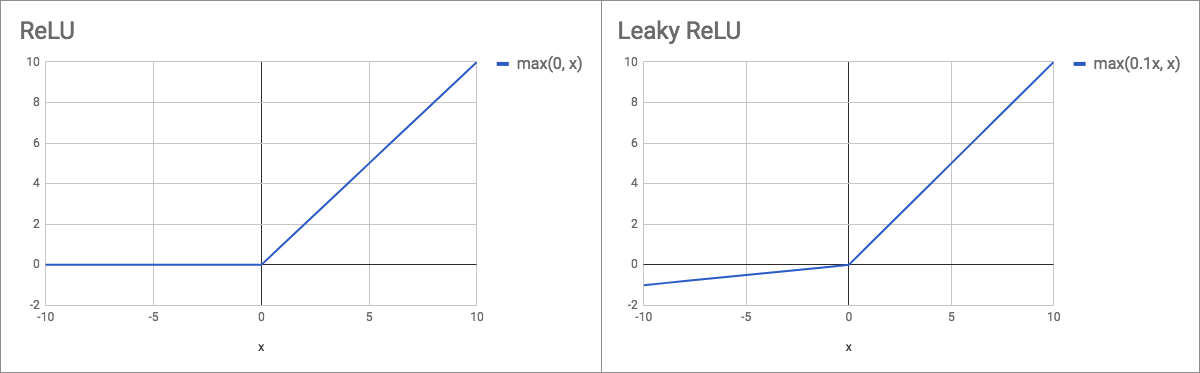

## Bottleneck to leverage 1x1 conv

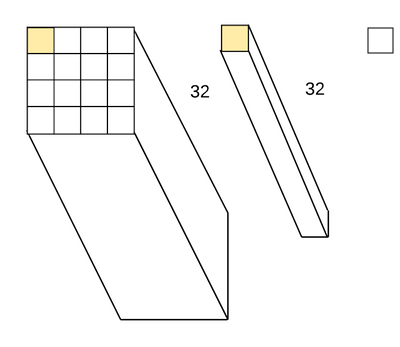
(https://cdn-images-1.medium.com/max/2000/1*Pc3_ut-tOnPm5FLdYqRrOA.png)

Another thing with the two conv_layer’s [22:14]: 
We had this idea of bottleneck (reducing the channels and then increase them again), 
there is also what kernel size to use. 
The first one has 1 by 1 Conv. 
What actually happen in 1 by 1 conv? 
If we have 4 by 4 grid with 32 filters/channels and we will do 1 by 1 conv, 
the kernel for the conv looks like the one in the middle. 
When we talk about the kernel size, we never mention the last piece — but let’s say it’s 1 by 1 by 32 because that’s the part of the filters in and filters out. 
The kernel gets placed on the first cell in yellow and we get a dot product these 32 deep bits which gives us our first output. 
We then move it to the second cell and get the second output. 
So there will be bunch of dot products for each point in the grid. 
It is allowing us to change the dimensionality in whatever way we want in the channel dimension. 
We are creating `ni//2` filters and we will have `ni//2` dot products which are basically different weighted averages of the input channels. 
With very little computation, it lets us add this additional step of calculations and nonlinearities. 
It is a cool trick to take advantage of these 1 by 1 convs, creating this bottleneck, and then pulling it out again with 3 by 3 convs — which will take advantage of the 2D nature of the input properly. 
Or else, 1 by 1 conv doesn’t take advantage of that at all.

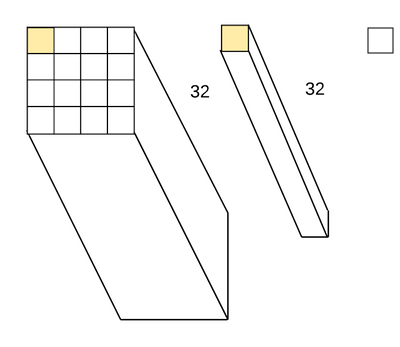

In [5]:
#from IPython.display import Image
#Image(url='https://cdn-images-1.medium.com/max/2000/1*Pc3_ut-tOnPm5FLdYqRrOA.png') 

## SELU (scaled exponential linear units)
Question: What is your opinion on SELU (scaled exponential linear units)? 
L12 [29:44] SELU is largely for fully connected layers which allows you to get rid of batch norm.
If you use this different activation function, it’s self normalizing. 
That is, it will always remain at a unit standard deviation and zero mean,
and therefore you don’t need batch norm. 

It is finicky — requires to use a very specific initialization otherwise it doesn’t start with exactly the right standard deviation and mean. 
Very hard to use it with things like embeddings, if you do then you have to use a particular kind of embedding initialization which doesn’t make sense for embeddings. 
And you do all this work, very hard to get it right, and if you do finally get it right, what’s the point? Well, you’ve managed to get rid of some batchnorm layers which weren’t really hurting you anyway. 

The SELU paper, by the inventor of LSTM, had a huge mathematical appendix. 
In practice, nobody is using it to get any state-of-the-art results or win competitions.

## Adaptive average pooling 

L12 [35:02]
NB: Nobody uses adaptive average pooling. 
Everyone writes nn.AvgPool2d(n) where n is a particular number.
Hence it is now tied to a particular image size which is not what we want. 
Most people think that a specific architecture is tied to a specific size. 
That is a problem, because it limits their ability to use smaller sizes,
or to kick-start their modeling or to use smaller size for doing experiments.

Explain adaptive average pooling: How does setting to 1 work [37:25]? 
Lets look first at **average** pooling: 
Let’s say we have 4x4 and we did avgpool((2, 2)) [40:35]. 
That creates 2x2 area (blue in the below) and takes the average of those four. 
If we pass in stride=1, the next one is 2x2 shown in green and take the average. 
So this is what a normal 2x2 average pooling would be. If we didn’t have any padding, that would spit out 3x3. If we wanted 4x4, we can add padding.

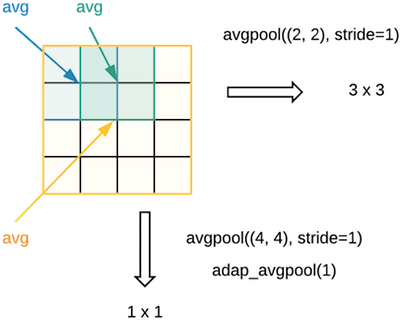

What if we wanted 1x1? 
Then we could say avgpool((4,4), stride=1) that would do 4x4 in yellow and average the whole lot which results in 1x1. 
But that’s just one way to do it. 
Rather than saying the size of the pooling filter, 
we prefer not to care what the size of the input grid is. 
We just want the output to be 1x1.  
That is what `adap_avgpool(1)` does. 
No need to say anything about the size of the pooling filter, 
just states the size of the output we want. 
If you have a single integer $n$, it assumes you mean $n by n$. 

In this case, adaptive average pooling 1 with a 4x4 grid coming in is the same as average pooling (4, 4). 
If it was 7x7 grid coming in, it would be the same as average pooling (7, 7). 
It is the same operation, but expressing it in a way that regardless of the input, 
we state what we want of the output.

L12 [1:07:50] Question: In ConvBlock, is there a reason why batch norm comes after ReLU (i.e. self.bn(self.relu(…))) [1:07:50]? I would normally expect to go ReLU then batch norm [1:08:23] that this is actually the order that makes sense to Jeremy. The order we had in the darknet was what they used in the darknet paper, so everybody seems to have a different order of these things. In fact, most people for CIFAR10 have a different order again which is batch norm → ReLU → conv which is a quirky way of thinking about it, but it turns out that often for residual blocks that works better. That is called a “pre-activation ResNet.” There is a few blog posts out there where people have experimented with different order of those things and it seems to depend a lot on what specific dataset it is and what you are doing with — although the difference in performance is small enough that you won’t care unless it’s for a competition.